In [1]:
import numpy as np
import pybhjet
import matplotlib.pyplot as plt

In [2]:
erg2eV = 6.242e+11 #1erg in eV
Hz2eV = 4.13566553853599e-15 # 1Hz in eV


Create an instance of the PyBHJet class

In [3]:
bhjet = pybhjet.PyBHJet()

In [4]:
# it is possible to change all 28 parameters at once from a text file with 28 lines with the value for each parameter
bhjet.load_params("example_parameters.dat")

# parameters can be changed like this (Mbh is the parameter name, 1e8 is the value)
bhjet.set_parameter("Mbh", 1e8)

# print a list of all parameters and their current values
bhjet.print_parameters()

BHJet Parameters:
-----------------
Mbh      : 1e+08       M_sun
theta    : 66          degrees
dist     : 9080        kpc
redsh    : 0.003633    
jetrat   : 0.00064     Eddington ratio
r_0      : 7.72058     Jet base radius, R_g
z_diss   : 24.971      nT particle injection region, R_g
z_acc    : 24.971      Jet acceleration region, R_g
z_max    : 100000      Maximum Jet Distance, R_g
t_e      : 655.986     Temperature of rel. electrons in nozzle, keV
f_nth    : 0.1         Percentage of particles acc. into nT tail 
f_pl     : 4.67634     Dissipation Parameter
pspec    : 1.5         Slope of nT lepton distribution
f_heat   : 16.247      Shock Heating
f_beta   : 0.1         Adiabatic Cooling Timescale
f_sc     : 7.98968e-09  < 0.1, Max. E of nT particles
p_beta   : 0.02        Plasma Beta [Regulates Pair Content in BHJet for velsw > 1] 
sig_acc  : 0.01        Magnetization at acceleration region
l_disk   : 2.3e-06     Disk Luminosity, L_edd
r_in     : 20          Inner Disk Radius, R_g


Calculate the fluxes for the current parameters

In [5]:
bhjet.run()

After the run() call, the results like the fluxes can be read out via a separate Output class. This contains multiple lists (total, and one for each component) of DataPoints, a combination of the energy (DataPoint.energy - this is technically the frequency in Hz) and flux (DataPoint.flux).

In [6]:
output = bhjet.get_output()
# output.total

An example plot - showing how to read out the total flux and the components

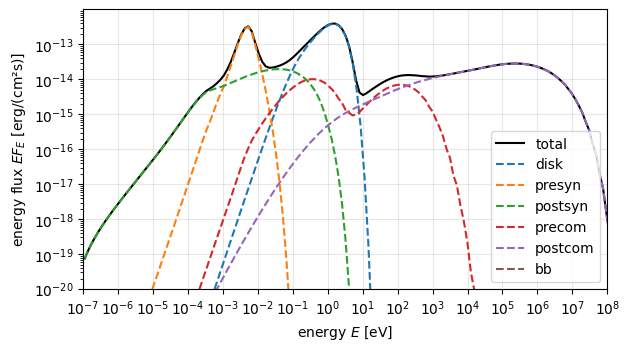

In [7]:
fig, ax = plt.subplots()

E_total, F_E_total = np.array([[datapoint.energy*Hz2eV, datapoint.flux] for datapoint in output.total]).T
ax.loglog(E_total, E_total*F_E_total/erg2eV, c="k", label="total")

for component in ["disk", "presyn", "postsyn", "precom", "postcom", "bb"]:
    E, F_E = np.array([[datapoint.energy*Hz2eV, datapoint.flux] for datapoint in getattr(output, component)]).T
    ax.loglog(E, E*F_E/erg2eV, ls="--", label=component)

ax.legend()
ax.set_xlim(1e-7, 1e8)
ax.set_ylim(1e-20, 1e-12)
ax.set_aspect("equal")
ax.grid(alpha=0.3)
ax.set_xlabel(r"energy $E$ [eV]")
ax.set_ylabel(r"energy flux $EF_E$ [erg/(cm²s)]")
ax.set_xticks(10**np.arange(-7.,8.5))
ax.set_yticks(10**np.arange(-20.,-12.5))
fig.tight_layout()